In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy import ndimage
from scipy import stats

from image_proc.tds_analysis import TDSImage
from mint.snapshot import SnapshotDB

In [2]:
db = SnapshotDB("20210221-01_30_17_scan_phase1.pcl")
df = db.load()

In [3]:
path = df.loc[0,"XFEL.DIAG/CAMERA/OTRA.473.B2D/IMAGE_EXT_ZMQ"][2:-4] + ".pcl"
path

'tds_images/OTRA.473.B2D-20210221_003018_075.pcl'

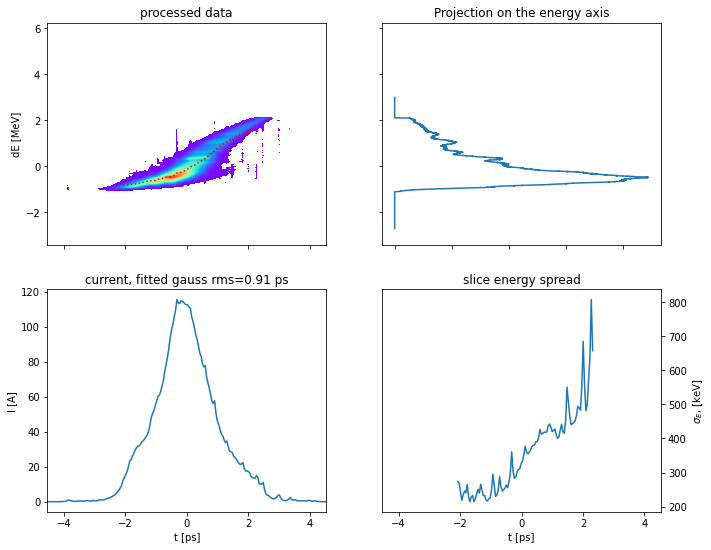

In [4]:
tds_img = TDSImage()
tds_img.filename = path
tds_img.process()
tds_img.plot()

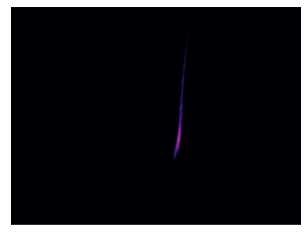

In [5]:
image = pickle.load(open(path,"rb"))

plt.imshow(image, cmap="magma")
plt.xticks([])
plt.yticks([])
plt.show()

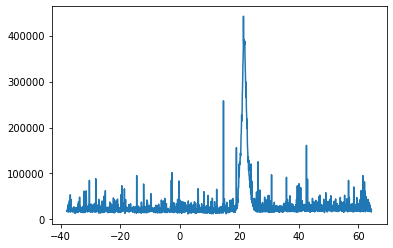

In [18]:
ps_per_pixel = 0.0438912
center, _ = ndimage.center_of_mass(image)
time_deltas = (np.linspace(0, image.shape[1], image.shape[1]) - center) * ps_per_pixel
current_projection = image.sum(axis=0)

plt.plot(time_deltas, current_projection)
plt.show()

In [11]:

xs

array([-37.83845341, -37.79453712, -37.75062082, ...,  38.883314  ,
        38.92723029,  38.97114659])